In [10]:
import pandas as pd

In [11]:
hof_train = pd.read_csv("./Resources/hof_train_data.csv")

In [12]:
hof_train.head()

,playerID,Starting Year,Last Year,Full Name,pos,MVP,height,weight,college,birthDate,...,Total FG Made,Total FT Attempted,Total FT Made,Total Three Attempted,Total Three Made,Total FG Points,Total Three Made Points,Total FG %,Total FT %,Total Three %
0,abdulka01,1969,1988,Kareem Abdul-Jabbar,C,6,85.0,225.0,UCLA,4/16/1947,...,18193,10723,7762,22,1,36386,3,0.555868,0.723865,0.045455
1,archina01,1970,1983,Nathaniel Archibald,G,0,73.0,150.0,UTEP,9/2/1948,...,6134,5996,4859,102,21,12268,63,0.465261,0.810374,0.205882
2,arizipa01,1950,1961,Paul Joseph Arizin,F-G,0,74.0,190.0,Villanova,4/9/1928,...,6039,6628,5374,0,0,12078,0,0.420690,0.810803,NaN
3,barklch01,1984,1999,Charles Wade Barkley,F,1,77.0,250.0,Auburn,2/20/1963,...,9444,9691,7100,2271,602,18888,1806,0.537507,0.732639,0.265081
4,barryri01,1965,1979,Richard Francis Dennis Barry,F,0,79.0,205.0,Miami (FL),3/28/1944,...,10795,7118,6340,614,219,21590,657,0.454756,0.890700,0.356678


In [13]:
hof_train['Total Turnovers'] *= -1

In [14]:
from sklearn.model_selection import train_test_split
y = hof_train['Year Inducted'].values.reshape(-1, 1)
data = hof_train.drop(['Year Inducted'] ,axis=1)
data.head()

,playerID,Starting Year,Last Year,Full Name,pos,MVP,height,weight,college,birthDate,...,Total FG Made,Total FT Attempted,Total FT Made,Total Three Attempted,Total Three Made,Total FG Points,Total Three Made Points,Total FG %,Total FT %,Total Three %
0,abdulka01,1969,1988,Kareem Abdul-Jabbar,C,6,85.0,225.0,UCLA,4/16/1947,...,18193,10723,7762,22,1,36386,3,0.555868,0.723865,0.045455
1,archina01,1970,1983,Nathaniel Archibald,G,0,73.0,150.0,UTEP,9/2/1948,...,6134,5996,4859,102,21,12268,63,0.465261,0.810374,0.205882
2,arizipa01,1950,1961,Paul Joseph Arizin,F-G,0,74.0,190.0,Villanova,4/9/1928,...,6039,6628,5374,0,0,12078,0,0.420690,0.810803,NaN
3,barklch01,1984,1999,Charles Wade Barkley,F,1,77.0,250.0,Auburn,2/20/1963,...,9444,9691,7100,2271,602,18888,1806,0.537507,0.732639,0.265081
4,barryri01,1965,1979,Richard Francis Dennis Barry,F,0,79.0,205.0,Miami (FL),3/28/1944,...,10795,7118,6340,614,219,21590,657,0.454756,0.890700,0.356678


In [15]:
data=data.drop(['playerID','Starting Year','Last Year','Full Name','pos','college','birthDate','deathDate','race','Total FG %','Total FT %','Total Three %','Total GS','Total Off. Rebounds',
                'Total Def. Rebounds','Total PF','Total FG Attempted','Total FG Made','Total FT Attempted','Total FT Made','Total Three Attempted','Total Three Made','Total FG Points',
                'Total Three Made Points','height','weight'], axis=1)


In [16]:
feature_names = data.columns
data.head()

,MVP,Total GP,Total Minutes,Total Points,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
0,6,1797,66297,44149,19921,6427,1349,3665,-2974
1,0,923,32801,17148,2123,6782,753,83,-1245
2,0,762,26712,17452,6533,1793,0,0,0
3,1,1196,44179,26590,14128,4697,1841,996,-3729
4,0,1125,42214,28149,7538,5408,1210,308,-1496


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y, random_state=42)
X_train.head()

,MVP,Total GP,Total Minutes,Total Points,Total Rebounds,Total Assists,Total Steals,Total Blocks,Total Turnovers
15,2,748,26367,13679,11136,1308,111,382,-2203
73,0,721,17726,9709,3904,1285,0,0,0
39,0,1351,46506,30416,12388,3188,1018,582,-2787
9,0,837,25960,10439,2687,2796,218,68,0
84,0,1686,54162,22147,4659,17645,3603,365,-4761


In [19]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

C:\Users\dcoar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
import numpy as np
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled,np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.14473684210526316
Testing Data Score: 0.0


In [22]:
model2 = SVC(kernel='linear')
model2.fit(X_test_scaled,np.ravel(y_test))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Testing Data Score: 0.38461538461538464


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [50,100, 300,500,800],
              'gamma': [1,0.1, 0.01,0.001,0.0001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [25]:
grid.fit(X_train_scaled,np.ravel(y_train))

C:\Users\dcoar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dcoar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=50, gamma=1 ...................................................
[CV] ......................... C=50, gamma=1, score=0.0, total=   0.0s
[CV] C=50, gamma=1 ...................................................
[CV] ........ C=50, gamma=1, score=0.043478260869565216, total=   0.0s
[CV] C=50, gamma=1 ...................................................
[CV] ......................... C=50, gamma=1, score=0.0, total=   0.0s
[CV] C=50, gamma=0.1 .................................................
[CV] ....................... C=50, gamma=0.1, score=0.0, total=   0.0s
[CV] C=50, gamma=0.1 .................................................
[CV] ...... C=50, gamma=0.1, score=0.043478260869565216, total=   0.0s
[CV] C=50, gamma=0.1 .................................................
[CV] ....................... C=50, gamma=0.1, score=0.0, total=   0.0s
[CV] C=50, gamma=0.01 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished
C:\Users\dcoar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [50, 100, 300, 500, 800], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 100, 'gamma': 1}
0.039473684210526314


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train_scaled, np.ravel(y_train))
rf.score(X_test_scaled,np.ravel(y_test))

0.038461538461538464

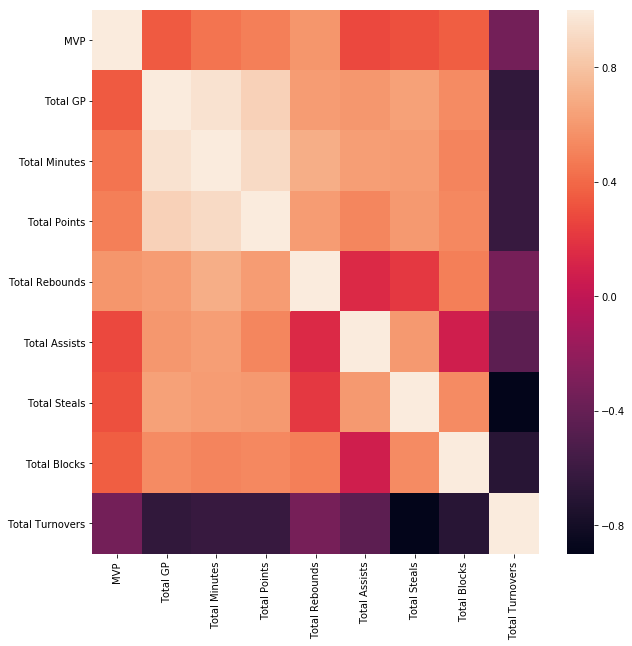

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax)

In [29]:
importances = rf.feature_importances_
importances

array([0.03039272, 0.14995   , 0.13497997, 0.13957028, 0.12923342,
       0.15231211, 0.09147182, 0.0918345 , 0.08025519])

In [30]:
sorted(zip(rf.feature_importances_,feature_names), reverse=True)

[(0.1523121108049562, 'Total Assists'),
 (0.14994999892470995, 'Total GP'),
 (0.13957027654290735, 'Total Points'),
 (0.1349799673873272, 'Total Minutes'),
 (0.1292334221019856, 'Total Rebounds'),
 (0.09183450041365156, 'Total Blocks'),
 (0.09147181678538496, 'Total Steals'),
 (0.08025519060656744, 'Total Turnovers'),
 (0.03039271643250911, 'MVP')]